In [1]:
import torch
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

Here, the $t_c$ values are temperatures in Celsius, and the $t_u$ values are our unknown units. We can expect noise in both measurements, coming from the devices themselves and from our approximate readings. For convenience, we’ve already put the data into tensors; we’ll use it in a minute.

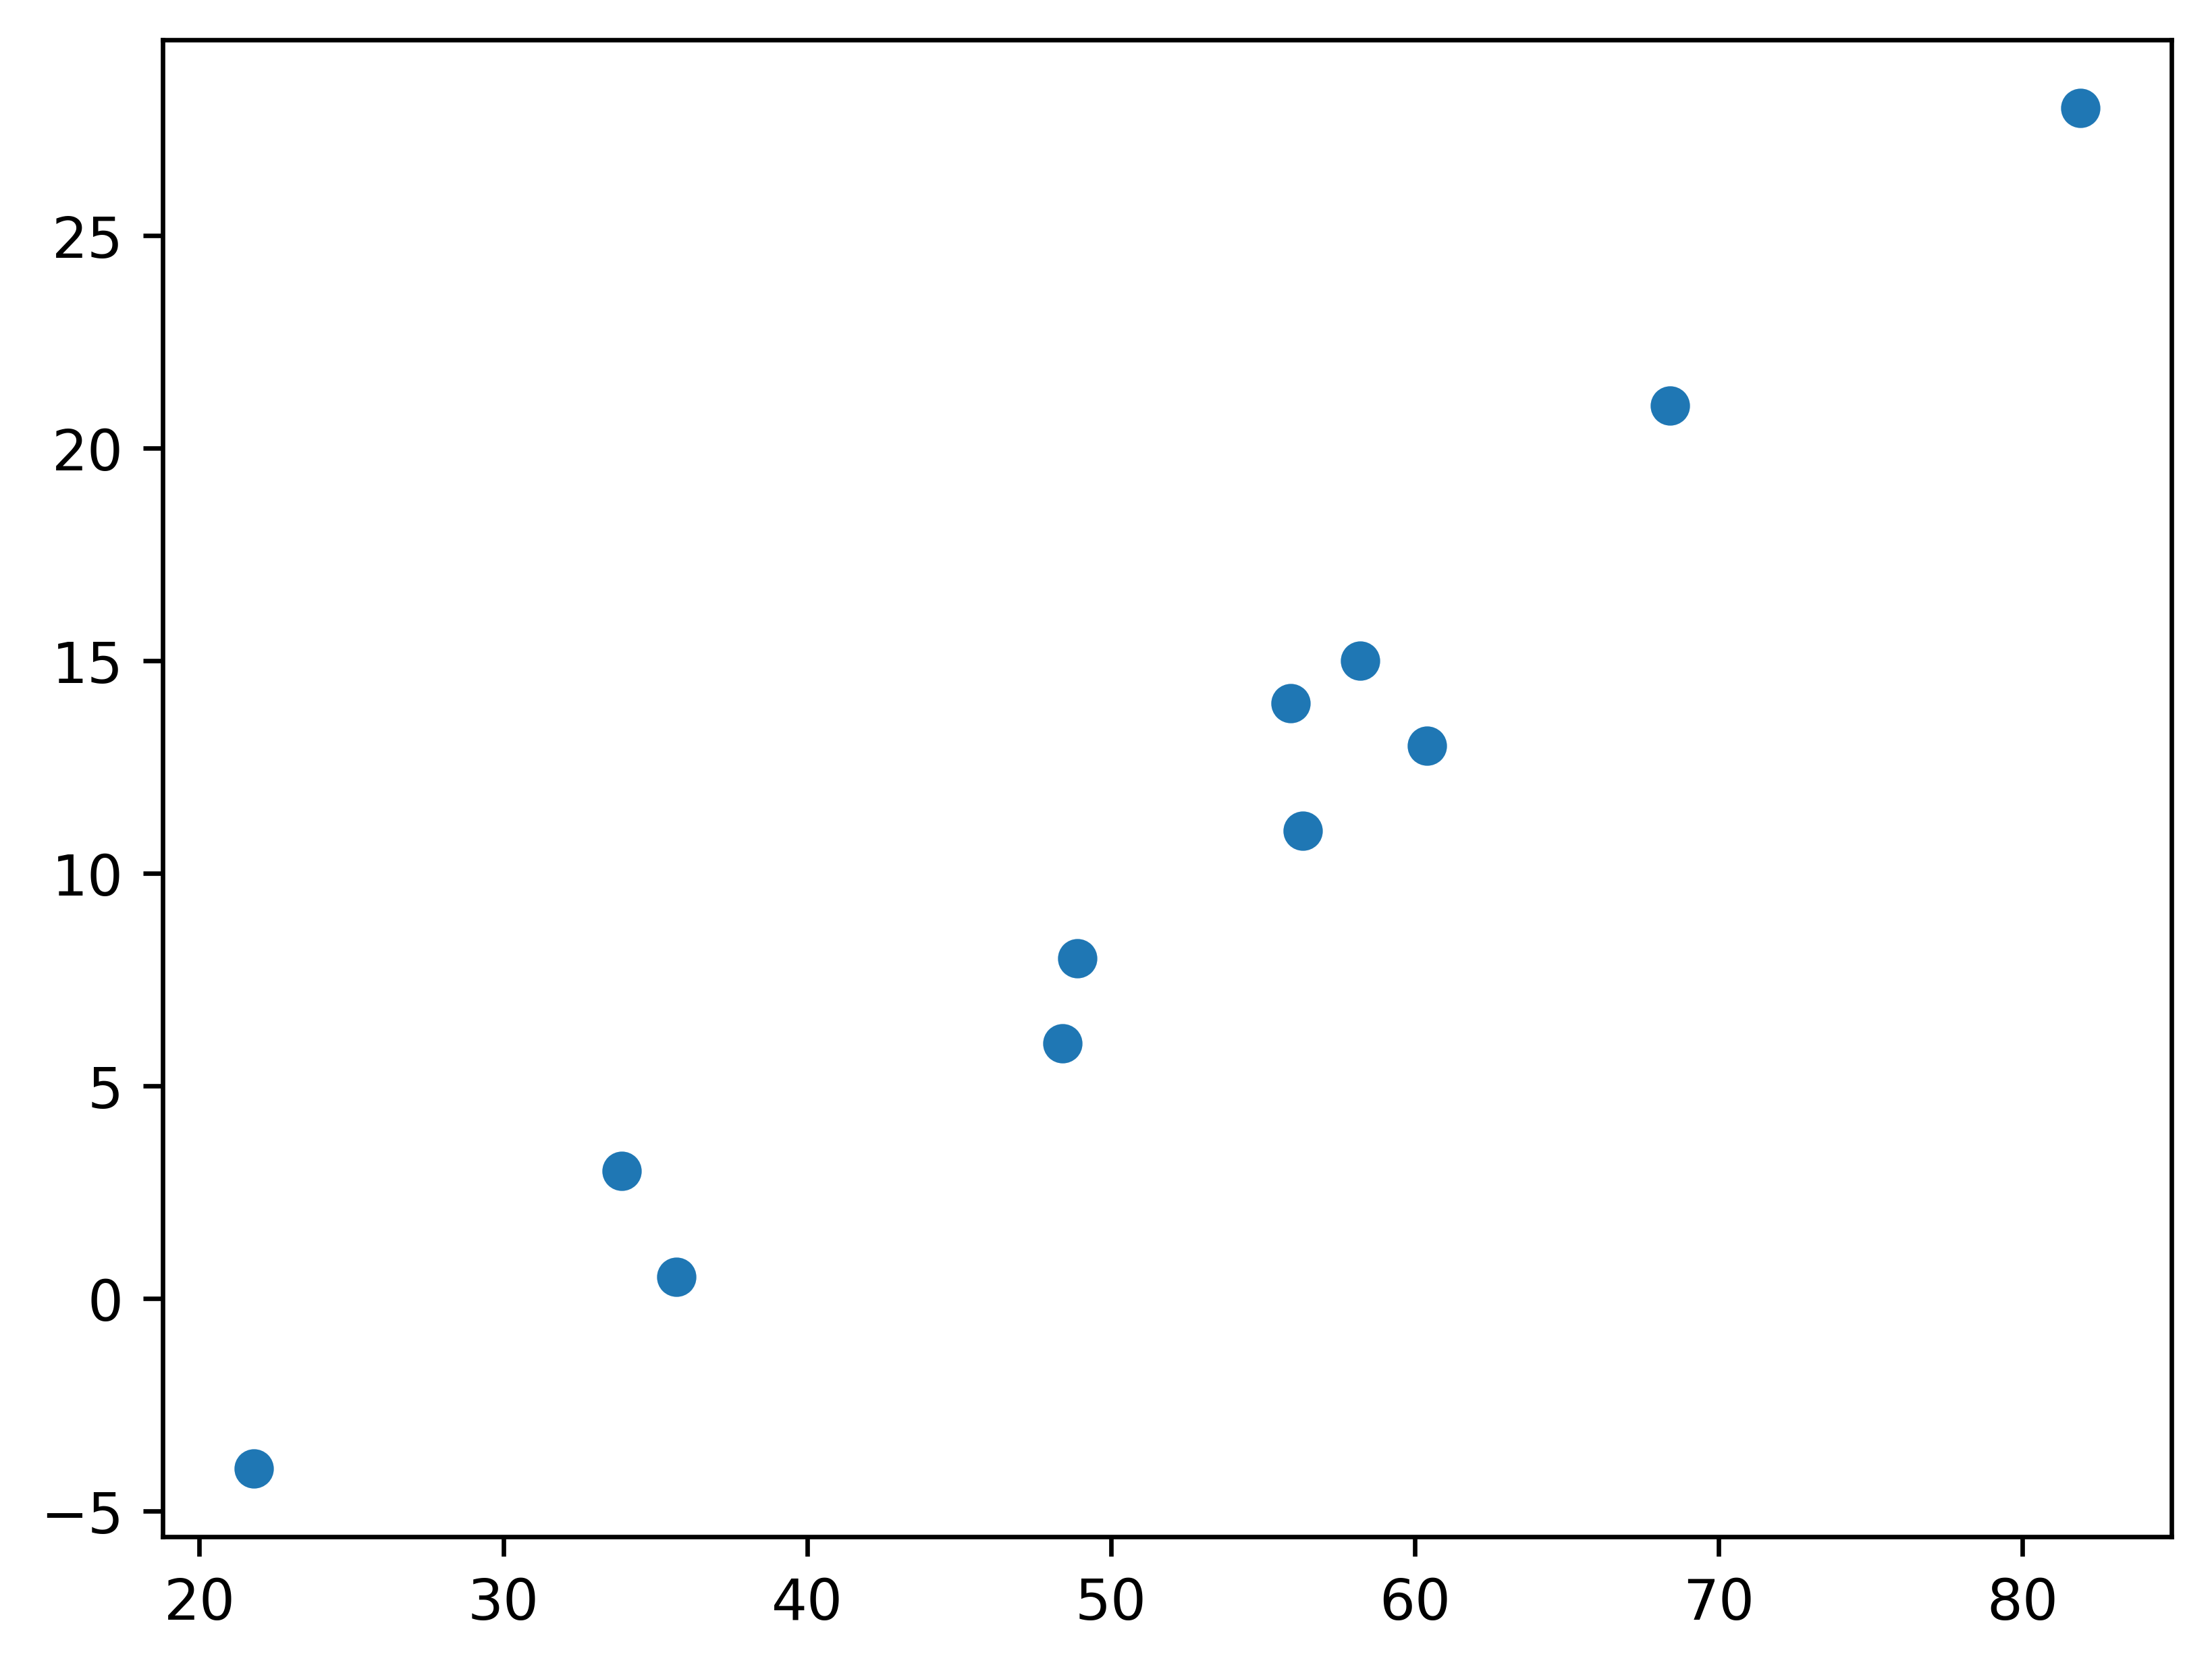

In [3]:
plt.figure(dpi=600)
plt.scatter(t_u, t_c)
plt.show()

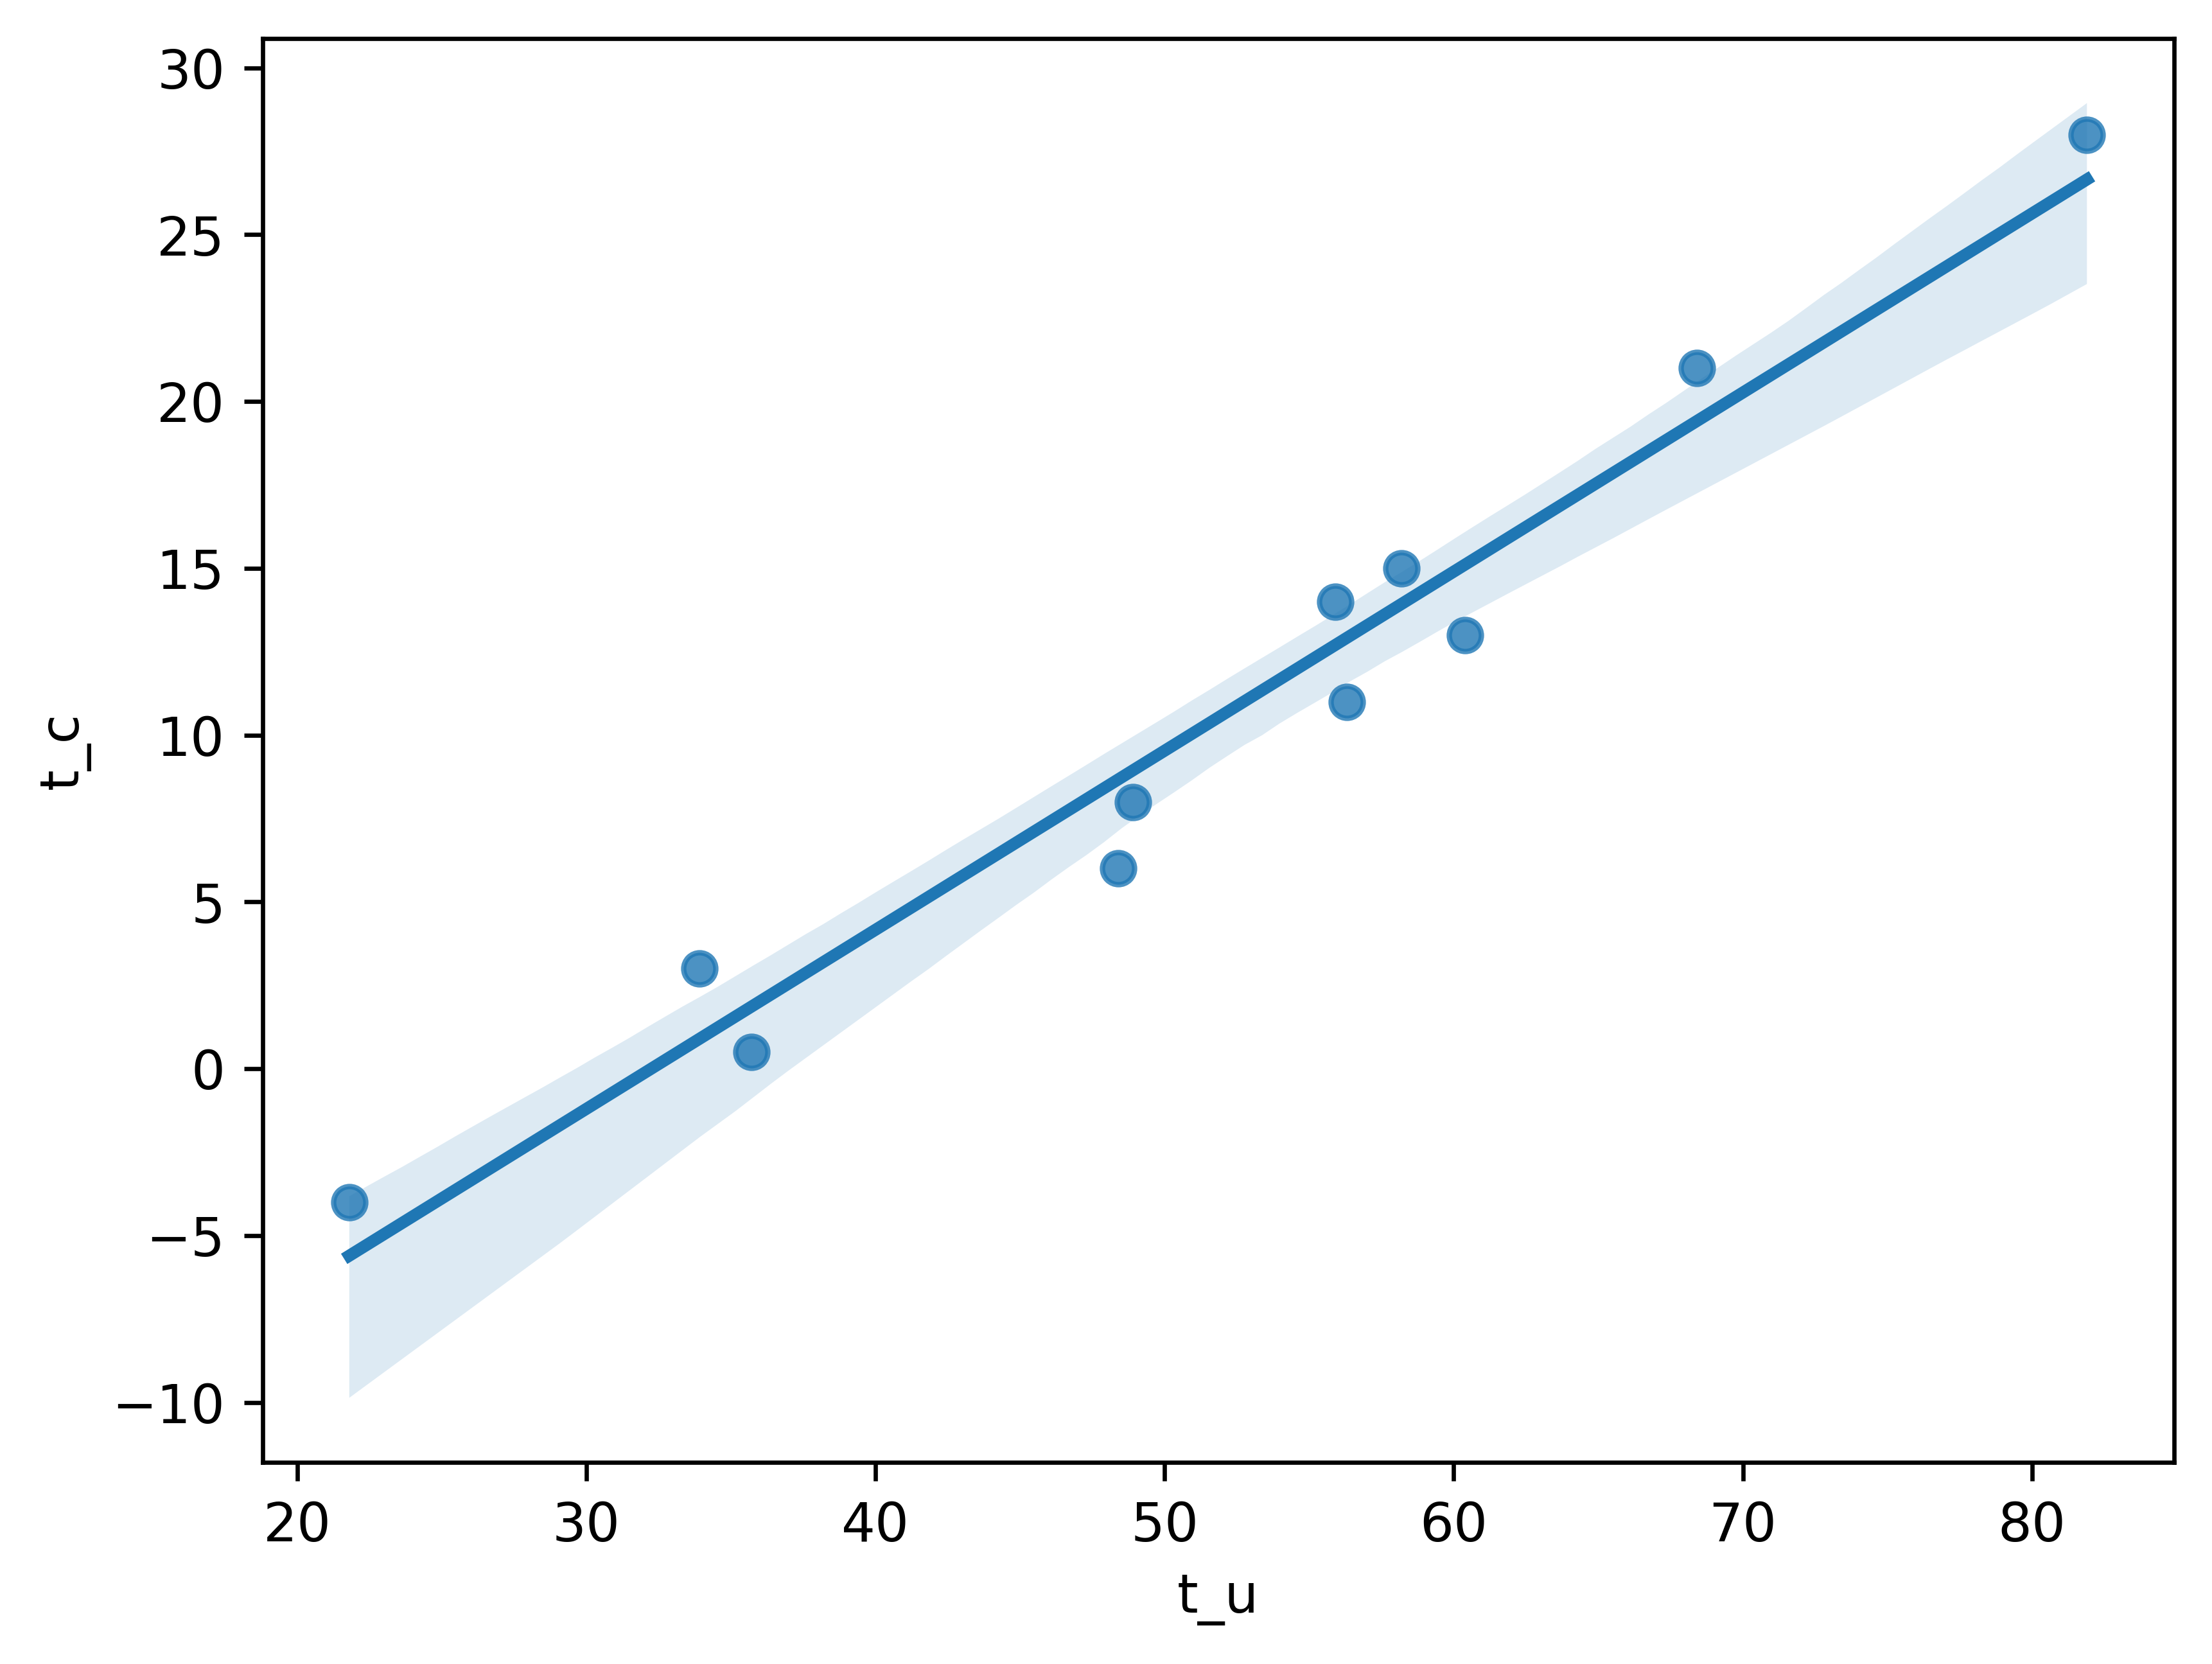

In [4]:
plt.figure(dpi=600)
sns.regplot(x = 't_u', y = 't_c', data = pd.DataFrame({'t_u': t_u, 't_c': t_c}))
plt.show();

This code creates a regression plot using the `sns.regplot` function from the Seaborn library. The plot shows the relationship between the input variable `t_u` and the output variable `t_c`.

The `sns.regplot` function takes three arguments:
- `x='t_u'`: This specifies the name of the column to use for the x-axis. In this case, it is the `'t_u'` column.
- `y='t_c'`: This specifies the name of the column to use for the y-axis. In this case, it is the `'t_c'` column.
- `data=pd.DataFrame({'t_u': t_u, 't_c': t_c})`: This specifies the data to use for the plot. The data is provided as a Pandas DataFrame with two columns: `'t_u'` and `'t_c'` containing the input and output variables, respectively.

The resulting plot shows a linear relationship between `t_u` and `t_c`, with a positive slope. This suggests that there is a strong correlation between the input and output variables, and that a linear regression model may be a good fit for this data.

In [5]:
def model(t_u, w, b):
    return w * t_u + b

This code defines a linear regression model that takes in an input tensor `t_u`, and returns a tensor representing the predicted output values.

The model is defined using the equation `y = w * x + b`, where `w` is the weight tensor, `b` is the bias tensor, and `x` is the input tensor `t_u`. The model computes the dot product of the weight tensor and the input tensor, and adds the bias tensor to the result.

The `model` function takes three arguments:
- `t_u`: This is the input tensor, which represents the temperature in degrees Celsius.
- `w`: This is the weight tensor, which represents the slope of the linear regression line.
- `b`: This is the bias tensor, which represents the y-intercept of the linear regression line.

The output of the `model` function is a tensor representing the predicted output values, which in this case is the temperature in degrees Celsius -Because the author of this chapter is Italian, so we may forgive him for using sensible units-.

In [6]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

This code defines a loss function that computes the mean squared error between the predicted output values `t_p` and the actual output values `t_c`.

The `loss_fn` function takes two arguments:
- `t_p`: This is a tensor representing the predicted output values.
- `t_c`: This is a tensor representing the actual output values.

The function first computes the element-wise squared difference between $t_p$ and $t_c$ using the expression $(t_p - t_c)^2$. It then computes the mean of the squared differences using the `mean` method of the tensor.

The output of the `loss_fn` function is a scalar tensor representing the mean squared error between the predicted and actual output values. This loss function is commonly used in linear regression problems to measure the difference between the predicted and actual output values.

In [7]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [8]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [9]:
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
        loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

This code computes the rate of change of the loss function with respect to the weight tensor `w` using numerical differentiation.

The code first sets the value of `delta` to 0.1, which is a small number used to compute the numerical derivative. 

The rate of change of the loss function with respect to `w` is computed using the following formula:

$ \frac{\partial loss}{\partial w} \approx \frac{loss_{fn} \{ model(t_u, w + \delta, b), t_c \} - loss_{fn} \{ model(t_u, w - \delta, b), t_c \} }{2 \delta} $


This formula computes the difference between the loss function evaluated at `w + delta` and `w - delta`, and divides the result by `2.0 * delta`. This gives an approximation of the derivative of the loss function with respect to `w`.




In [10]:
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w

This code updates the value of the weight tensor `w` using the computed rate of change of the loss function with respect to `w` and a learning rate.

The code first sets the value of the learning rate to `1e-2`, which is a small positive number that controls the step size of the update.

The value of `w` is then updated using the following formula:

$w := w - l_r \times \frac{\partial loss}{\partial w}$


This formula subtracts the product of the learning rate and the rate of change of the loss function with respect to `w` from the current value of `w`. This updates the value of `w` in the direction that minimizes the loss function.

The resulting value of `w` is a tensor that has been updated using gradient descent. This process is repeated iteratively until the loss function converges to a minimum.

In [11]:
#We can do the same with b:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
        loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b

$\frac{\partial loss_{fn}}{ \partial w} = \frac{\partial loss_{fn}}{\partial t_p} \times \frac{\partial t_p}{\partial w}$

In [12]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)   #The division is from the derivative of mean.
    return dsq_diffs

In [13]:
def dmodel_dw(t_u, w, b):
    return t_u

In [14]:
def dmodel_db(t_u, w, b):
    return 1.0

In [15]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])    #The summation is the reverse of the
                                                            #    broadcasting we implicitly do when
                                                            #    applying the parameters to an entire
                                                            #    vector of inputs in the model.

In [16]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)  #Forward pass
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b) #Backward pass
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))   #This logging line can be very verbose.
    return params

This code defines a training loop that performs gradient descent to optimize the parameters of a linear regression model.

The `training_loop` function takes five arguments:
- `n_epochs`: This is the number of epochs to train the model for.
- `learning_rate`: This is the learning rate used during gradient descent.
- `params`: This is a tuple containing the initial values of the weight and bias tensors.
- `t_u`: This is the input tensor, which represents the temperature in degrees Celsius.
- `t_c`: This is the output tensor, which represents the temperature in degrees Fahrenheit.

The function iteratively performs the following steps for each epoch:
- Computes the predicted output tensor `t_p` using the current values of the weight and bias tensors.
- Computes the loss between the predicted output tensor `t_p` and the actual output tensor `t_c`.
- Computes the gradient of the loss function with respect to the weight and bias tensors using the `grad_fn` function.
- Updates the values of the weight and bias tensors using gradient descent.
- Logs the current epoch number and loss value.

The function returns the final values of the weight and bias tensors after training.

This training loop is used to optimize the parameters of a linear regression model using gradient descent. The goal is to minimize the loss function and find the values of `w` and `b` that best fit the input-output relationship.

In [17]:
training_loop(
n_epochs = 100,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_u,
t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 5802484.500000
Epoch 3, Loss 19408029696.000000
Epoch 4, Loss 64915905708032.000000
Epoch 5, Loss 217130525461053440.000000
Epoch 6, Loss 726257583152928129024.000000
Epoch 7, Loss 2429183416467662896627712.000000
Epoch 8, Loss 8125122549611731432050262016.000000
Epoch 9, Loss 27176882120842590626938030653440.000000
Epoch 10, Loss 90901105189019073810297959556841472.000000
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss

tensor([nan, nan])

The learning rate caused the model to diverge, it overshoots the minimum and the loss function increases with each epoch. This is because the learning rate is too large, and the gradient descent update steps are too big, so the author of this chapter reduced it to $10^{-4}$. This caused the loss to converge to a minimum.

In [18]:
training_loop(
n_epochs = 100,
learning_rate = 1e-4,
params = torch.tensor([1.0, 0.0]),
t_u = t_u,
t_c = t_c)

Epoch 1, Loss 1763.884766
Epoch 2, Loss 323.090515
Epoch 3, Loss 78.929634
Epoch 4, Loss 37.552845
Epoch 5, Loss 30.540283
Epoch 6, Loss 29.351154
Epoch 7, Loss 29.148884
Epoch 8, Loss 29.113848
Epoch 9, Loss 29.107145
Epoch 10, Loss 29.105247
Epoch 11, Loss 29.104168
Epoch 12, Loss 29.103222
Epoch 13, Loss 29.102295
Epoch 14, Loss 29.101379
Epoch 15, Loss 29.100466
Epoch 16, Loss 29.099548
Epoch 17, Loss 29.098631
Epoch 18, Loss 29.097717
Epoch 19, Loss 29.096796
Epoch 20, Loss 29.095881
Epoch 21, Loss 29.094959
Epoch 22, Loss 29.094049
Epoch 23, Loss 29.093134
Epoch 24, Loss 29.092216
Epoch 25, Loss 29.091301
Epoch 26, Loss 29.090385
Epoch 27, Loss 29.089464
Epoch 28, Loss 29.088551
Epoch 29, Loss 29.087635
Epoch 30, Loss 29.086714
Epoch 31, Loss 29.085804
Epoch 32, Loss 29.084888
Epoch 33, Loss 29.083967
Epoch 34, Loss 29.083057
Epoch 35, Loss 29.082142
Epoch 36, Loss 29.081221
Epoch 37, Loss 29.080309
Epoch 38, Loss 29.079390
Epoch 39, Loss 29.078474
Epoch 40, Loss 29.077562
Epoch 

tensor([ 0.2327, -0.0438])

In [19]:
t_un = 0.1 * t_u

In [20]:
training_loop(
n_epochs = 100,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_un, #We’ve updated t_u to our new, rescaled t_un.
t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([ 2.7553, -2.5162])

Even though we set our learning rate back to $10^{-2}$, parameters don’t blow up during
iterative updates. Let’s take a look at the gradients: they’re of similar magnitude, so
using a single learning_rate for both parameters works just fine. We could probably
do a better job of normalization than a simple rescaling by a factor of 10, but since
doing so is good enough for our needs, we’re going to stick with that for now.

**NOTE**: The normalization here absolutely helps get the network trained, but you could make an argument that it’s not strictly needed to optimize the parameters for this particular problem. That’s absolutely true! This problem is small enough that there are numerous ways to beat the parameters into submission. However, for larger, more sophisticated problems, normalization is an easy and effective (if not crucial!) tool to use to improve model convergence.

In [21]:
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c,)
params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

tensor([  5.3671, -17.3012])

The resulting value of `params` is a tensor containing the optimized values of the weight and bias tensors. These values can be used to make predictions using the linear regression model.

To make a prediction using the linear regression model, you can call the `model` function with the input tensor `t_un` and the optimized values of the weight and bias tensors. This will return a tensor containing the predicted output values.

Here's an example of how to make a prediction using the optimized parameters:
``` Python 
w, b = params
t_p = model(t_un, w, b)
```


This code sets the values of `w` and `b` to the optimized values returned by the `training_loop` function. It then calls the `model` function with the input tensor `t_un` and the optimized values of `w` and `b` to compute the predicted output tensor `t_p`.

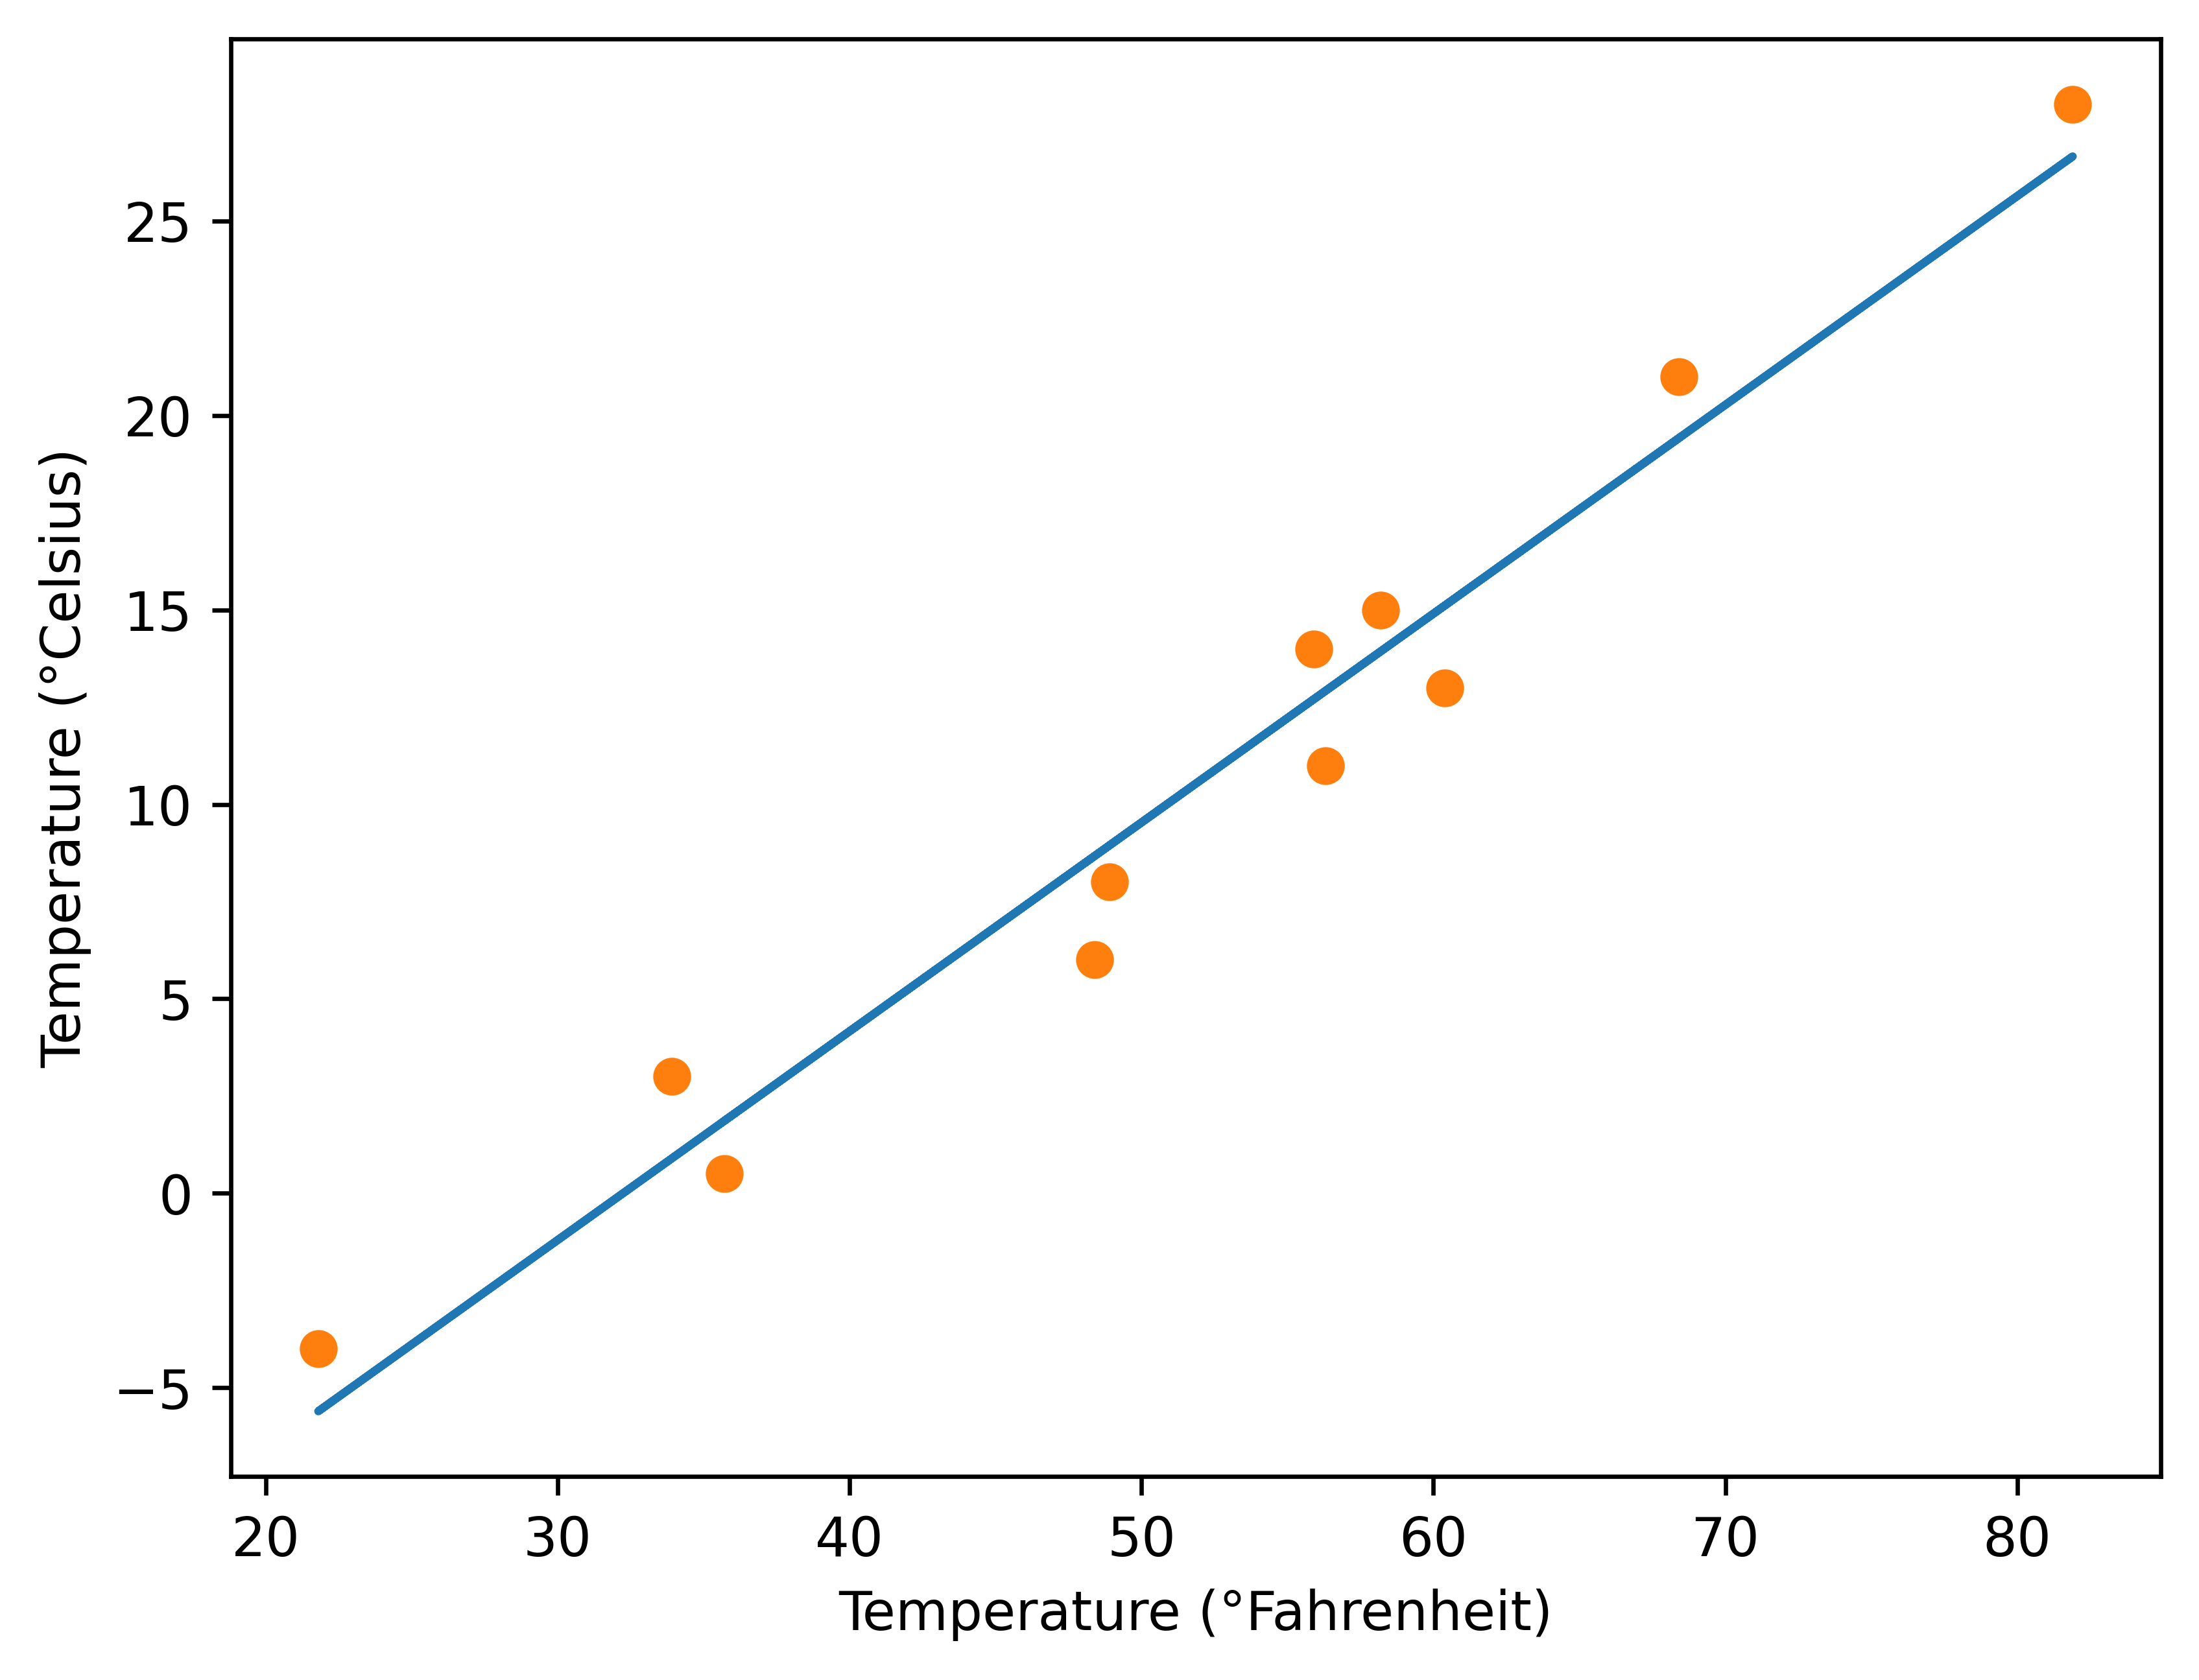

In [22]:
t_p = model(t_un, *params)  #Remember that we’re training on the 
                            #    normalized unknown units. We also 
                            #    use argument unpacking
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())  #But we’re plotting the raw unknown values
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.show();

We are using a Python trick called argument unpacking here: *params means to pass the elements of params as individual arguments. In Python, this is usually done with lists or tuples, but we can also use argument unpacking with PyTorch tensors, which are split along the leading dimension. So here, model 
``` Python 
(t_un, *params)
```
is equivalent to
```Python
model(t_un, params[0], params[1])
```

In [23]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

This code creates a tensor `params` with two elements, `[1.0, 0.0]`, and sets the `requires_grad` attribute to `True`.

The `requires_grad` attribute is a flag that indicates whether the tensor should be included in the computation graph for automatic differentiation. When `requires_grad` is set to `True`, any operation that involves the tensor will be tracked by PyTorch, and gradients can be computed with respect to the tensor using the `backward` method.

In this case, `params` represents the weight and bias tensors of a linear regression model, and we want to compute gradients with respect to these tensors during training. By setting `requires_grad` to `True`, we ensure that PyTorch tracks the operations involving `params` and allows us to compute gradients with respect to it.

In [24]:
params.grad is None

True

In general, all PyTorch tensors have an attribute named grad. Normally, it’s `None`.

In [25]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad

tensor([4517.2969,   82.6000])

This code computes the gradients of the loss function with respect to the weight and bias tensors using automatic differentiation.

The code first computes the predicted output tensor `t_p` using the `model` function and the current values of the weight and bias tensors stored in the `params` tensor.

The code then computes the loss between the predicted output tensor `t_p` and the actual output tensor `t_c` using the `loss_fn` function.

The `backward` method is called on the `loss` tensor to compute the gradients of the loss function with respect to all tensors that have `requires_grad` set to `True`. In this case, the `params` tensor has `requires_grad` set to `True`, so its gradients are computed.

The gradients of the `params` tensor are accessed using the `grad` attribute of the tensor. This attribute returns a tensor containing the gradients of the tensor with respect to the loss function.



In [26]:
if params.grad is not None:
    params.grad.zero_()

This code resets the gradients of the `params` tensor to zero.

The `params` tensor is a tensor with `requires_grad` set to `True`, which means that its gradients are computed during backpropagation. Before computing the gradients for a new batch of data, it is necessary to reset the gradients to zero to avoid accumulating gradients from previous batches.

The code first checks if the `grad` attribute of the `params` tensor is not `None`. If the `grad` attribute is not `None`, it means that gradients have been computed for the tensor during the previous iteration of the training loop.

The `zero_` method is called on the `grad` attribute of the `params` tensor to reset the gradients to zero. The `_` at the end of the method name indicates that the method operates in-place and modifies the tensor directly.

After resetting the gradients to zero, the `params` tensor can be used to compute gradients for a new batch of data during the next iteration of the training loop.

In [27]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None: #This could be done at any point in the 
                                    #   loop prior to calling loss.backward().
            params.grad.zero_()

        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()

        with torch.no_grad():   #This is a somewhat cumbersome bit 
                                #   of code, but as we’ll see in the next 
                                #   section, it’s not an issue in practice.

            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

This code defines a training loop that performs gradient descent to optimize the parameters of a linear regression model.

The `training_loop` function takes five arguments:
- `n_epochs`: This is the number of epochs to train the model for.
- `learning_rate`: This is the learning rate used during gradient descent.
- `params`: This is a tensor containing the initial values of the weight and bias tensors.
- `t_u`: This is the input tensor, which represents the temperature in units.
- `t_c`: This is the output tensor, which represents the temperature in degrees Celsius.

The function iteratively performs the following steps for each epoch:
- Resets the gradients of the `params` tensor to zero using the `zero_` method.
- Computes the predicted output tensor `t_p` using the current values of the weight and bias tensors.
- Computes the loss between the predicted output tensor `t_p` and the actual output tensor `t_c`.
- Computes the gradient of the loss function with respect to the weight and bias tensors using the `backward` method.
- Updates the values of the weight and bias tensors using gradient descent.
- Logs the current epoch number and loss value.

The function returns the final values of the weight and bias tensors after training.

The `with torch.no_grad()` block is used to temporarily disable gradient tracking during the weight and bias updates. This is done to improve performance and avoid unnecessary memory usage.

The `if params.grad is not None` block is used to check if gradients have been computed for the `params` tensor during the previous iteration of the training loop. If gradients have been computed, the gradients are reset to zero using the `zero_` method before computing gradients for the current batch of data.

In [28]:
training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0], requires_grad=True), #Adding requires_grad=True is key.
t_u = t_un, #Again, we’re using the normalized t_un instead of t_u.
t_c = t_c)

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

This code trains a linear regression model using the `training_loop` function and the given hyperparameters.

The code sets the number of epochs to 5000, the learning rate to `1e-2`, and the initial values of the weight and bias tensors to `1.0` and `0.0`, respectively. The `requires_grad` attribute of the `params` tensor is set to `True` to enable gradient computation during training.

The `training_loop` function is called with these hyperparameters, as well as the input tensor `t_un` and the output tensor `t_c`. The function returns the final values of the weight and bias tensors after training.

The resulting value of `params` is a tensor containing the optimized values of the weight and bias tensors. These values can be used to make predictions using the linear regression model.

In [29]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

Each optimizer exposes two methods: zero_grad and step. zero_grad zeroes the
grad attribute of all the parameters passed to the optimizer upon construction. step
updates the value of those parameters according to the optimization strategy implemented by the specific optimizer.

In [30]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

This code sets up stochastic gradient descent (SGD) optimization for a linear regression model.

The code creates a tensor `params` with two elements, `[1.0, 0.0]`, and sets the `requires_grad` attribute to `True`. This tensor represents the weight and bias tensors of a linear regression model.

The code sets the learning rate to `1e-5` using the `learning_rate` variable.

The code creates an optimizer object `optimizer` using the `optim.SGD` function. The optimizer takes a list of tensors to optimize as its argument, which in this case is `[params]`. The `lr` argument is used to set the learning rate of the optimizer to the value of `learning_rate`.

The optimizer object can be used to perform gradient descent updates on the `params` tensor during training. Instead of manually updating the `params` tensor using the gradients computed during backpropagation, we can call the `step` method of the optimizer to perform the update. The optimizer also provides additional functionality such as momentum and weight decay, which can be useful for improving convergence and preventing overfitting.

In [31]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()
optimizer.step()
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

This code performs a single iteration of stochastic gradient descent (SGD) optimization for a linear regression model.

The code first computes the predicted output tensor `t_p` using the `model` function and the current values of the weight and bias tensors stored in the `params` tensor.

The code then computes the loss between the predicted output tensor `t_p` and the actual output tensor `t_c` using the `loss_fn` function.

The `backward` method is called on the `loss` tensor to compute the gradients of the loss function with respect to all tensors that have `requires_grad` set to `True`. In this case, the `params` tensor has `requires_grad` set to `True`, so its gradients are computed.

The `step` method of the `optimizer` object is called to perform a single optimization step. The optimizer updates the values of the weight and bias tensors stored in the `params` tensor using the gradients computed during backpropagation and the learning rate specified during optimizer initialization.

The resulting value of `params` is a tensor containing the updated values of the weight and bias tensors after a single iteration of SGD optimization. These values can be used to make predictions using the linear regression model.

In [32]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()   #As before, the exact placement of 
                        #    this call is somewhat arbitrary. It 
                        #    could be earlier in the loop as well
loss.backward()
optimizer.step()
params

tensor([1.7761, 0.1064], requires_grad=True)

The `zero_grad` method of the `optimizer` object is called to reset the gradients of all tensors being optimized by the optimizer to zero. This is necessary because PyTorch accumulates gradients by default, so we need to zero them out before computing new gradients.

In [33]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [34]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
n_epochs = 5000,
optimizer = optimizer,
params = params, #It’s important that both 
                 #   params are the same object; 
                 #   otherwise the optimizer won’t 
                 #   know what parameters were 
                 #   used by the model.

t_u = t_un,
t_c = t_c)

Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [35]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate) #Adam is a variant of SGD,
                                                   # it's lr learning rate is set adaptively
training_loop(
    n_epochs = 2000,
    optimizer = optimizer,
    params = params,
    t_u = t_u,  #We’re back to the original t_u as our input,
                #  adam is less sensitive to the scale of the input
    t_c = t_c)

Epoch 500, Loss 7.612900
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928579
Epoch 2000, Loss 2.927644


tensor([  0.5367, -17.3021], requires_grad=True)

In [36]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
train_indices, val_indices  #Since these are random, don’t 
                            #    be surprised if your values end 
                            #    up different from here on out.


(tensor([ 6,  2,  5, 10,  0,  8,  9,  1,  4]), tensor([7, 3]))

This code performs a train-validation split on the input and output tensors `t_u` and `t_c`.

The code first computes the number of samples in the input tensor `t_u` using the `shape` method and the `0` index. This gives us the number of rows in the tensor, which is the number of samples.

The code then computes the number of validation samples as `int(0.2 * n_samples)`. This is 20% of the total number of samples.

The code generates a random permutation of integers from `0` to `n_samples - 1` using the `randperm` function of the `torch` module. This gives us a random ordering of the indices of the samples.

The code selects the first `n_samples - n_val` indices from the shuffled indices as the training indices using Python slicing. This gives us a list of indices for the training set.

The code selects the last `n_val` indices from the shuffled indices as the validation indices using Python slicing. This gives us a list of indices for the validation set.

The code returns the training indices and validation indices as a tuple. These indices can be used to index into the input and output tensors to obtain the training and validation sets.

In [37]:
train_t_u = t_u[train_indices] #fancy indexing
train_t_c = t_c[train_indices]
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

This code uses the training and validation indices generated in the previous step to split the input and output tensors `t_u` and `t_c` into training and validation sets.

The code uses fancy indexing to select the rows of `t_u` and `t_c` corresponding to the training indices and assigns them to `train_t_u` and `train_t_c`, respectively. Similarly, the code selects the rows of `t_u` and `t_c` corresponding to the validation indices and assigns them to `val_t_u` and `val_t_c`, respectively.

The code then normalizes the training and validation input tensors by multiplying them by `0.1` and assigns the results to `train_t_un` and `val_t_un`, respectively. This is the same normalization factor used earlier to normalize the input tensor.

The resulting tensors `train_t_u`, `train_t_c`, `val_t_u`, `val_t_c`, `train_t_un`, and `val_t_un` can be used to train and validate a linear regression model.

In [38]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                    train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)   #These two pairs of lines are the 
                                                #    same except for the train_* vs. 
                                                #    val_* inputs.
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = model(val_t_u, *params) 
        val_loss = loss_fn(val_t_p, val_t_c)
        optimizer.zero_grad()
        train_loss.backward()          #Note that there is no val_loss.backward() 
                                       #    here, since we don’t want to train the 
                                       #    model on the validation data.
        optimizer.step()
        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                f" Validation loss {val_loss.item():.4f}")
    return params

This code defines a training loop function `training_loop` that trains a linear regression model using the given hyperparameters and input and output tensors.

The function takes as input the number of epochs to train for `n_epochs`, the optimizer object `optimizer`, the tensor of model parameters `params`, the training input tensor `train_t_u`, the validation input tensor `val_t_u`, the training output tensor `train_t_c`, and the validation output tensor `val_t_c`.

The function loops over the specified number of epochs and performs the following steps:

1. Computes the predicted output tensor `train_t_p` for the training input tensor `train_t_u` using the `model` function and the current values of the weight and bias tensors stored in the `params` tensor.
2. Computes the loss between the predicted output tensor `train_t_p` and the actual output tensor `train_t_c` using the `loss_fn` function.
3. Computes the predicted output tensor `val_t_p` for the validation input tensor `val_t_u` using the `model` function and the current values of the weight and bias tensors stored in the `params` tensor.
4. Computes the loss between the predicted output tensor `val_t_p` and the actual output tensor `val_t_c` using the `loss_fn` function.
5. Zeros out the gradients of all tensors that have `requires_grad` set to `True` using the `zero_grad` method of the optimizer object.
6. Computes the gradients of the loss function with respect to all tensors that have `requires_grad` set to `True` using the `backward` method of the `train_loss` tensor.
7. Updates the values of the weight and bias tensors stored in the `params` tensor using the gradients computed during backpropagation and the learning rate specified during optimizer initialization using the `step` method of the optimizer object.
8. Prints the training and validation loss every 500 epochs or for the first three epochs.
9. Returns the final values of the weight and bias tensors after training.

The resulting values of `params` are the optimized values of the weight and bias tensors. These values can be used to make predictions using the linear regression model.

In [39]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
n_epochs = 3000,
optimizer = optimizer,
params = params,
train_t_u = train_t_un,     #Since we’re using SGD again, we’re back to using normalized inputs.
val_t_u = val_t_un, 
train_t_c = train_t_c,
val_t_c = val_t_c)

Epoch 1, Training loss 50.3755, Validation loss 215.3142
Epoch 2, Training loss 22.5148, Validation loss 136.3782
Epoch 3, Training loss 17.5463, Validation loss 111.6176
Epoch 500, Training loss 9.1372, Validation loss 43.9237
Epoch 1000, Training loss 5.7752, Validation loss 20.3462
Epoch 1500, Training loss 4.2485, Validation loss 10.1084
Epoch 2000, Training loss 3.5553, Validation loss 5.7752
Epoch 2500, Training loss 3.2406, Validation loss 4.0202
Epoch 3000, Training loss 3.0976, Validation loss 3.3665


tensor([  5.1257, -16.3117], requires_grad=True)

In [40]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                    train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        with torch.no_grad():   #Context manager here
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False  #Checks that our output requires_grad
                                                    # args are forced to False inside this block
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

This code defines a training loop function `training_loop` that trains a linear regression model using the given hyperparameters and input and output tensors.

The function takes as input the number of epochs to train for `n_epochs`, the optimizer object `optimizer`, the tensor of model parameters `params`, the training input tensor `train_t_u`, the validation input tensor `val_t_u`, the training output tensor `train_t_c`, and the validation output tensor `val_t_c`.

The function loops over the specified number of epochs and performs the following steps:

1. Computes the predicted output tensor `train_t_p` for the training input tensor `train_t_u` using the `model` function and the current values of the weight and bias tensors stored in the `params` tensor.
2. Computes the loss between the predicted output tensor `train_t_p` and the actual output tensor `train_t_c` using the `loss_fn` function.
3. Computes the predicted output tensor `val_t_p` for the validation input tensor `val_t_u` using the `model` function and the current values of the weight and bias tensors stored in the `params` tensor.
4. Computes the loss between the predicted output tensor `val_t_p` and the actual output tensor `val_t_c` using the `loss_fn` function. The `with torch.no_grad()` context manager is used to ensure that the gradients of the validation loss are not computed during backpropagation, since we don't want to update the model parameters based on the validation loss.
5. Zeros out the gradients of all tensors that have `requires_grad` set to `True` using the `zero_grad` method of the optimizer object.
6. Computes the gradients of the loss function with respect to all tensors that have `requires_grad` set to `True` using the `backward` method of the `train_loss` tensor.
7. Updates the values of the weight and bias tensors stored in the `params` tensor using the gradients computed during backpropagation and the learning rate specified during optimizer initialization using the `step` method of the optimizer object.

The resulting values of `params` are the optimized values of the weight and bias tensors. These values can be used to make predictions using the linear regression model.

In [41]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss

This code defines a function `calc_forward` that computes the forward pass of a linear regression model and the corresponding loss.

The function takes as input the input tensor `t_u`, the output tensor `t_c`, and a boolean flag `is_train` that indicates whether or not to compute gradients during the forward pass.

The function uses the `with torch.set_grad_enabled(is_train):` context manager to enable or disable gradient computation based on the value of `is_train`.

The function computes the predicted output tensor `t_p` for the input tensor `t_u` using the `model` function and the current values of the weight and bias tensors stored in the `params` tensor.

The function computes the loss between the predicted output tensor `t_p` and the actual output tensor `t_c` using the `loss_fn` function.

The function returns the loss tensor.

This function can be used during training to compute the loss for both the training and validation sets, with gradient computation enabled for the training set and disabled for the validation set.

## 5.6 Conclusion
We started this chapter with a big question: how is it that a machine can learn from
examples? We spent the rest of the chapter describing the mechanism with which a
model can be optimized to fit data. We chose to stick with a simple model in order to
see all the moving parts without unneeded complications.
 Now that we’ve had our fill of appetizers, in chapter 6 we’ll finally get to the main
course: using a neural network to fit our data. We’ll work on solving the same
thermometer problem, but with the more powerful tools provided by the torch.nn
module. We’ll adopt the same spirit of using this small problem to illustrate the
larger uses of PyTorch. The problem doesn’t need a neural network to reach a
solution, but it will allow us to develop a simpler understanding of what’s required to
train a neural network.

## 5.7 Exercise
1. Redefine the model to be $w2 \times t_u^2 + w_1 \times t_u + b$.
    * $a$ - What parts of the training loop, and so on, need to change to accommodate this redefinition?
    * $b$ - What parts are agnostic to swapping out the model?
    * $c$ - Is the resulting loss higher or lower after training?
    * $d$ - Is the actual result better or worse?

$a$ - To accommodate this redefinition, we need to modify the `model` function to compute the output tensor as $w_2 \times t_u^2 + w_1 \times t_u + b$ instead of $w_1 \times t_u + b$. We also need to modify the `training_loop` function to pass the updated `model` function to the optimizer and to compute the predicted output tensor using the updated `model` function.

$b$ - The parts that are agnostic to swapping out the model include the loss function, the optimizer, and the training and validation input and output tensors.

$c$ - It is difficult to predict whether the resulting loss will be higher or lower after training, as it depends on the specific dataset and hyperparameters used. However, since the new model has an additional degree of freedom, it may be able to fit the data more closely and potentially achieve a lower loss.

$d$ - The actual result may be better or worse depending on the specific dataset and hyperparameters used. We would need to evaluate the performance of the new model on a validation set to determine whether it is an improvement over the original model.

## 5.8 Summary
The chapter discusses the use of linear models and stochastic gradient descent for parameter estimation. It also introduces the concept of deep learning for creating generic models that can be automatically adapted to specific tasks. The goal of learning algorithms is to optimize model parameters based on observations, using a loss function to measure the error in carrying out a task. The chapter explains how the optim module in PyTorch provides ready-to-use optimizers for updating parameters and minimizing loss functions. Data is often split into training and validation sets to evaluate a model's performance, and overfitting can occur when a model's performance improves on the training set but degrades on the validation set due to lack of generalization.